10
Starting annealing.
Minimum Distance obtained:  624.3057260745549
Performace over Hurstic:  17.42%


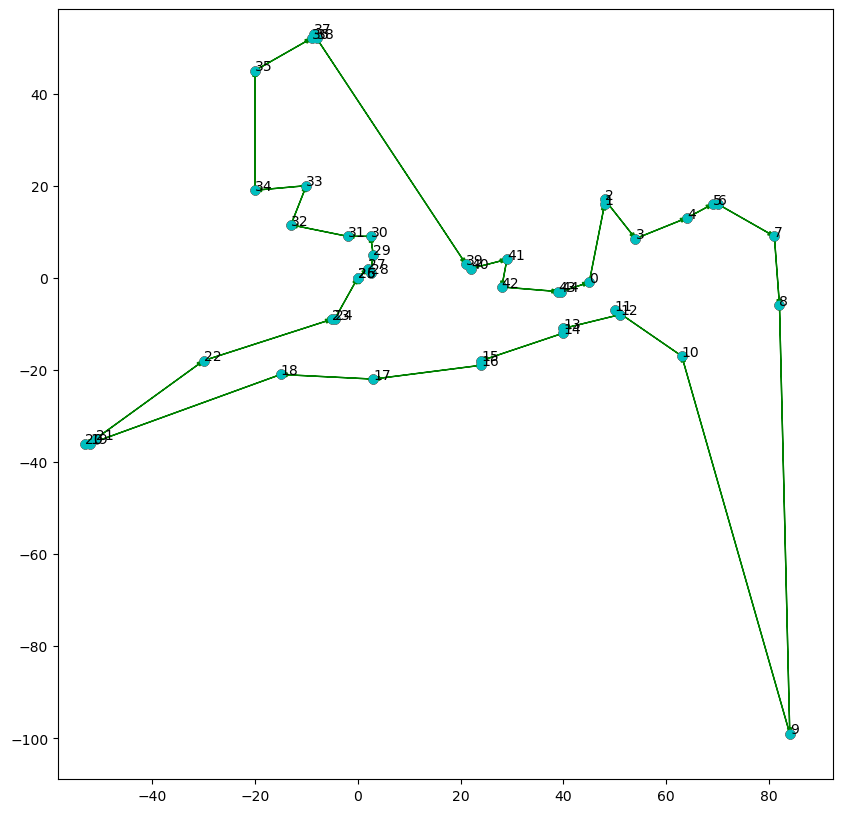

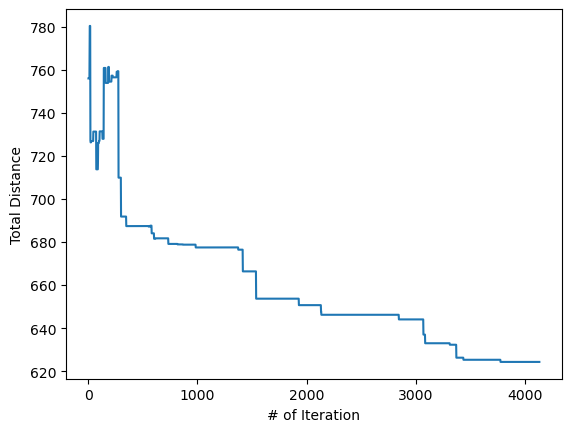

5
Starting annealing.
Minimum Distance obtained:  658.1783968089618
Performace over Hurstic:  11.68%


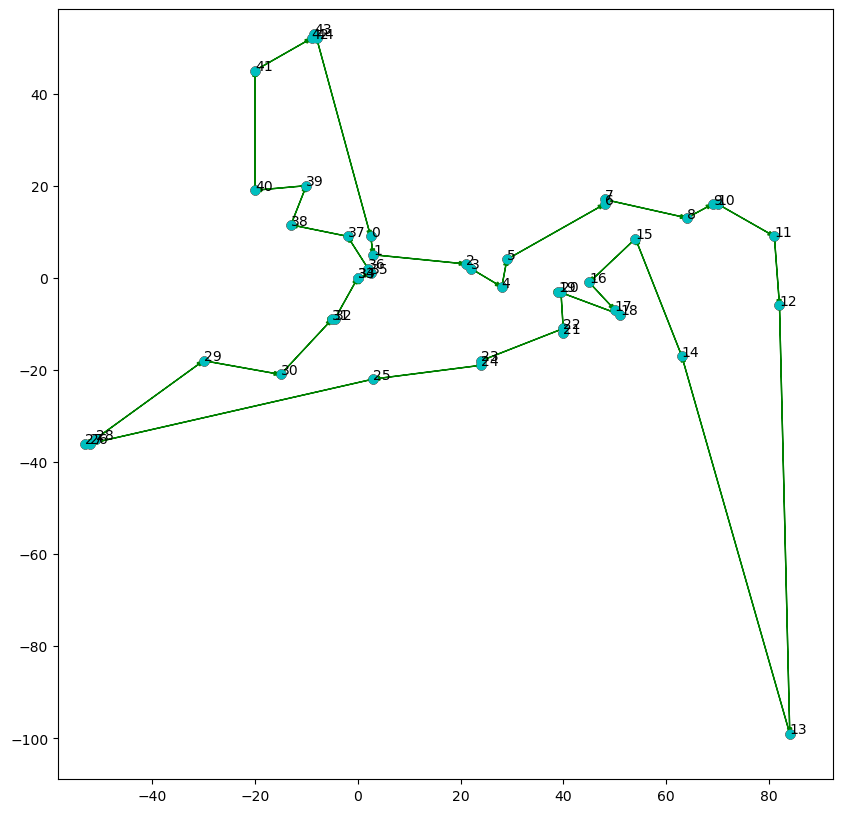

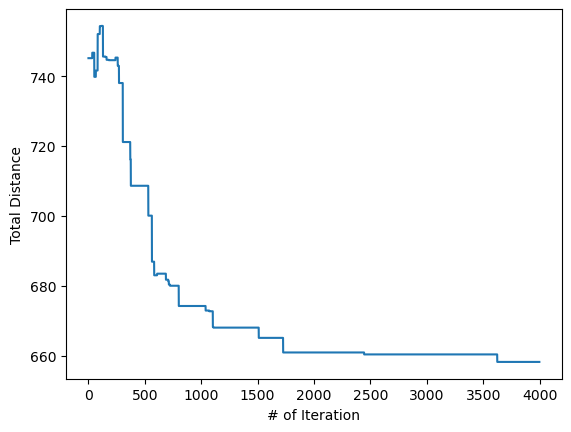

15
Starting annealing.
Minimum Distance obtained:  631.3291767566204
Performace over Hurstic:  14.04%


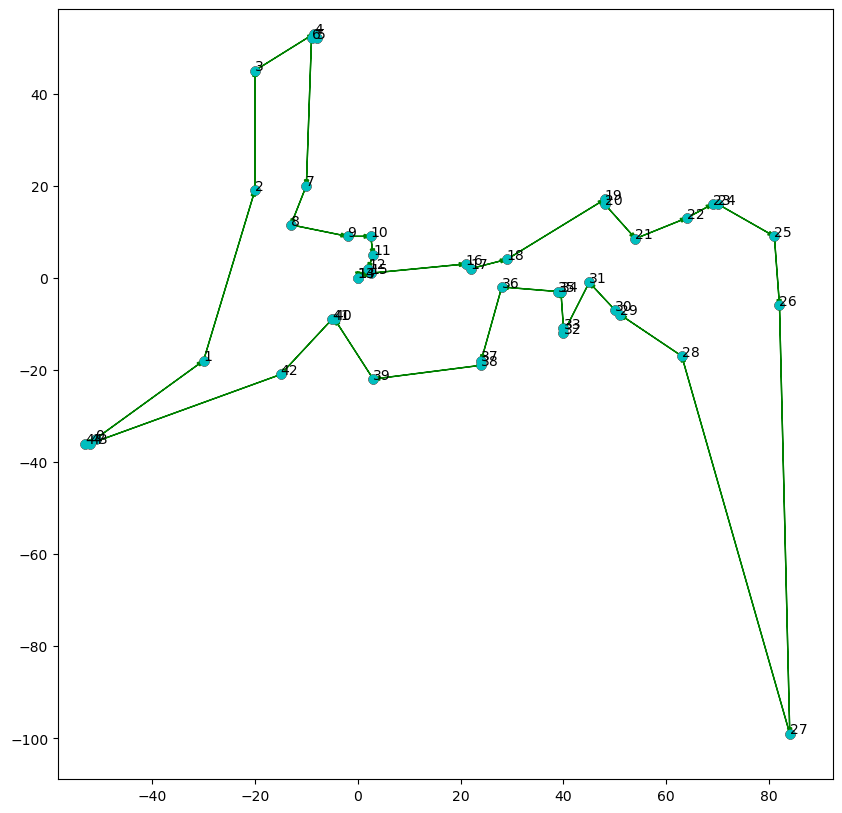

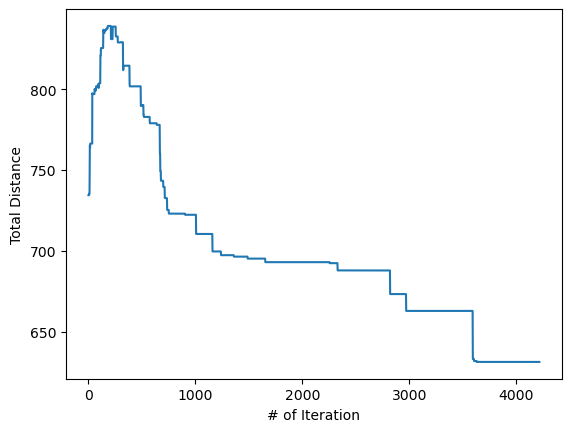

12
Starting annealing.
Minimum Distance obtained:  662.4313365595668
Performace over Hurstic:  18.38%


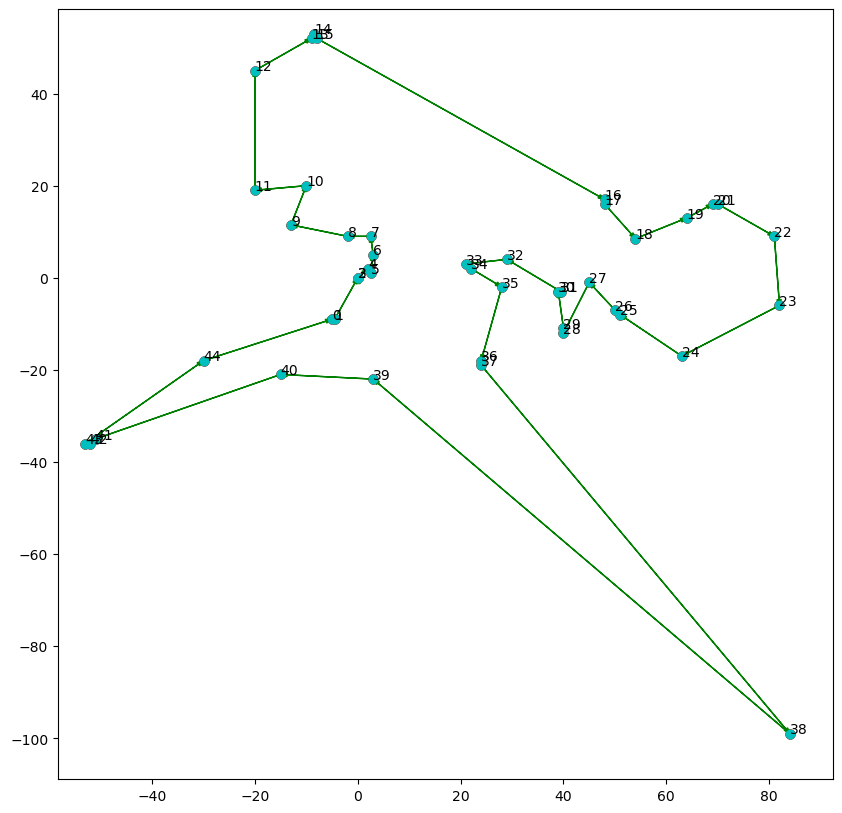

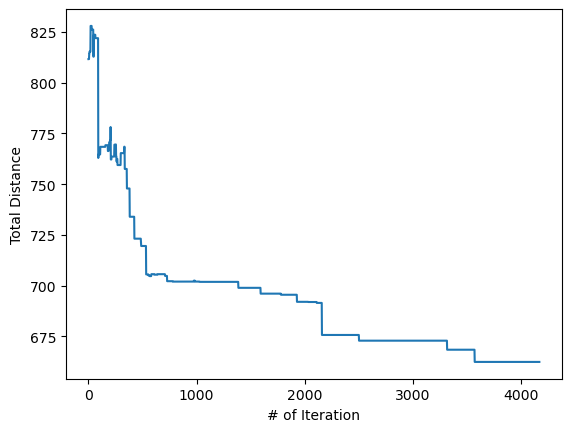

In [4]:
import math
import random
import matplotlib.pyplot as plt
     
class SimulatedAnneling(object):
    def __init__(self, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        self.coords = self.getCity("City.txt")
        self.N = len(self.coords)
        self.T = math.sqrt(self.N) if T == -1 else T
        print(self.T)
        self.T_save = self.T
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-8 if stopping_T == -1 else stopping_T
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1

        self.nodes = [i for i in range(self.N)]

        self.best_solution = None
        self.best_fitness = float("Inf")
        self.fitness_list = []

    def plotReport(self,paths, points, num_iters=1):
        
        x = []; y = []
        for i in paths[0]:
            x.append(points[i][0])
            y.append(points[i][1])

        plt.figure(figsize=(10, 10))
        plt.plot(x, y, 'co')
        labels=list(range(0, len(x)))
        for i in range(len(x)):
            plt.scatter(x,y)
            plt.annotate(labels[i], (x[i], y[i]))

        a_scale = float(max(x))/float(100)

        if num_iters > 1:

            for i in range(1, num_iters):

                xi = []; yi = [];
                for j in paths[i]:
                    xi.append(points[j][0])
                    yi.append(points[j][1])

                plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                        head_width = a_scale, color = 'r',
                        length_includes_head = True, ls = 'dashed',
                        width = 0.001/float(num_iters))
                for i in range(0, len(x) - 1):
                    plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                            head_width = a_scale, color = 'r', length_includes_head = True,
                            ls = 'dashed', width = 0.001/float(num_iters))

        plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
                color ='g', length_includes_head=True)
        for i in range(0,len(x)-1):
            plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                    color = 'g', length_includes_head = True)

        plt.xlim(min(x)*1.1, max(x)*1.1)
        plt.ylim(min(y)*1.1, max(y)*1.1)
        plt.show()
    
    def getCity(self,file):
        cityLocations = []
        with open(file, "r") as f:
            for cordination in f.readlines():
                cordination = [float(x.replace("\n", "")) for x in cordination.split(" ")]
                cityLocations.append(cordination)
       
        return cityLocations

    def initial_solution(self):
        cur_node = random.choice(self.nodes)  
        solution = [cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.Euclidean_dist(cur_node, x))  
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node

        cur_fit = self.Total_dist(solution)
        if cur_fit < self.best_fitness: 
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def Euclidean_dist(self, node_0, node_1):
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        return math.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def Total_dist(self, solution):
        cur_fit = 0
        for i in range(self.N):
            cur_fit += self.Euclidean_dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

    def setCopy(self, candidate):
        candidate_fitness = self.Total_dist(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print("Starting annealing.")
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.setCopy(candidate)
            self.T *= self.alpha
            self.iteration += 1

            self.fitness_list.append(self.cur_fitness)

        print("Minimum Distance obtained: ", self.best_fitness)
        improvement = 100 * (self.fitness_list[0] - self.best_fitness) / (self.fitness_list[0])
        print(f"Performace over Hurstic: {improvement : .2f}%")

    def draw_paths(self):
        self.plotReport([self.best_solution], self.coords)

    def learning_progress(self):
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Total Distance")
        plt.xlabel("# of Iteration")
        plt.show()



sa = SimulatedAnneling(stopping_iter=5000,T=10)
sa.anneal()
sa.draw_paths()
sa.learning_progress()

sa = SimulatedAnneling(stopping_iter=5000,T=5)
sa.anneal()
sa.draw_paths()
sa.learning_progress()

sa = SimulatedAnneling(stopping_iter=5000,T=15)
sa.anneal()
sa.draw_paths()
sa.learning_progress()

sa = SimulatedAnneling(stopping_iter=5000,T=12)
sa.anneal()
sa.draw_paths()
sa.learning_progress()